In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os

In [2]:
raw_df = pd.read_csv('weatherAUS.csv')

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

<Axes: xlabel='Date', ylabel='count'>

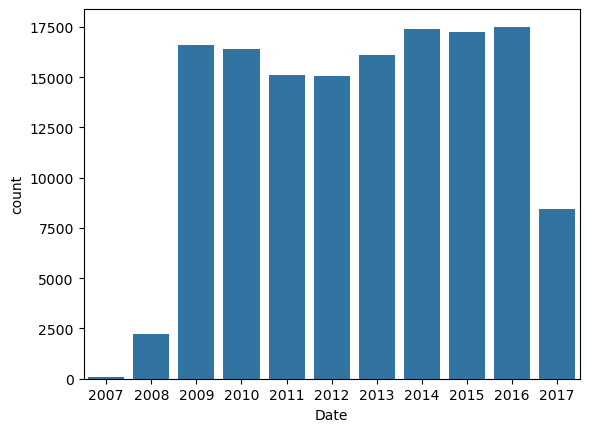

In [10]:
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [11]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[(year >= 2015) & (year < 2016)]
test_df = raw_df[year >= 2016]

In [12]:
print(f"Train set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Test set: {len(test_df)} samples")

Train set: 98988 samples
Validation set: 17231 samples
Test set: 25974 samples


In [13]:
input_cols = list(raw_df.columns[1:-1])

In [14]:
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [15]:
target_col = 'RainTomorrow'

In [16]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [26]:
numeric_cols = train_inputs.select_dtypes(include=[np.number]).columns.tolist()

In [27]:
categorical_cols = train_inputs.select_dtypes(exclude=[np.number]).columns.tolist()

In [28]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [29]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [34]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [35]:
train_inputs.describe() 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000
mean,0.211876,0.100552,0.000017,0.000442,0.036663,-0.044455,0.001247,0.002480,0.006865,0.005150,-16.196498,-15.624058,0.053186,0.054499,0.162300,0.113628
std,0.003522,0.002529,0.000062,0.000261,0.014020,0.000795,0.000791,0.001166,0.001887,0.002062,0.001839,0.001759,0.028290,0.026372,0.002917,0.002553
min,0.200472,0.090737,0.000000,0.000000,0.000000,-0.046512,0.000000,0.000000,0.000000,0.000000,-16.206612,-15.633600,0.000000,0.000000,0.151899,0.103647
25%,0.209372,0.098704,0.000000,0.000318,0.036171,-0.045009,0.000619,0.001718,0.005700,0.003700,-16.197623,-15.625178,0.037037,0.037037,0.160182,0.111782
50%,0.211764,0.100334,0.000000,0.000442,0.036663,-0.044529,0.001149,0.002510,0.006900,0.005200,-16.196498,-15.624058,0.053186,0.054499,0.162196,0.113431
75%,0.214434,0.102326,0.000006,0.000469,0.044369,-0.044108,0.001680,0.003171,0.008300,0.006500,-16.195328,-15.622960,0.074074,0.074074,0.164346,0.115343
max,0.224057,0.109641,0.002695,0.006897,0.068966,-0.038760,0.007692,0.011494,0.010000,0.010000,-16.190083,-15.617600,0.111111,0.111111,0.172996,0.122841


In [39]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('missing')
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('missing')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('missing')

In [40]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [41]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [42]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [43]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols]) 

C:\Users\abdul.DESKTOP-7C38D8K\AppData\Local\Temp\ipykernel_13788\2464927094.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\abdul.DESKTOP-7C38D8K\AppData\Local\Temp\ipykernel_13788\2464927094.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\abdul.DESKTOP-7C38D8K\AppData\Local\Temp\ipykernel_13788\2464927094.py:1: PerformanceWarning: DataFrame is hi

In [44]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [46]:
train_preds = clf.predict(x_train)


In [47]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [48]:
pd.value_counts(train_preds)

C:\Users\abdul.DESKTOP-7C38D8K\AppData\Local\Temp\ipykernel_13788\1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     76707
Yes    22281
Name: count, dtype: int64

In [49]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

In [50]:
train_probs = clf.predict_proba(x_train)

In [51]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [52]:
val_preds = clf.predict(x_val)

In [53]:
clf.score(x_val, val_targets)

0.7911902965585282

In [54]:
val_targets.value_counts() / len(val_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80, 20))
